<a href="https://colab.research.google.com/github/srivastavaprateesh/DataScience/blob/master/Mahindra_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import scipy as sp,pickle as pkl

In [0]:
df=pd.read_csv('C:/Users/Prateesh/Downloads/bank-additional-full.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

# 2. Convert Target to 1/0

In [0]:
df["target"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)

In [0]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [0]:
df.drop('y',axis=1,inplace=True)

# 3. Descriptive Stats/Exploratory Analysis

In [0]:
df.target.value_counts()/len(df)

0    0.887346
1    0.112654
Name: target, dtype: float64

In [0]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [0]:
miss=df.isnull().sum()/len(df)
miss

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
target            0.0
dtype: float64

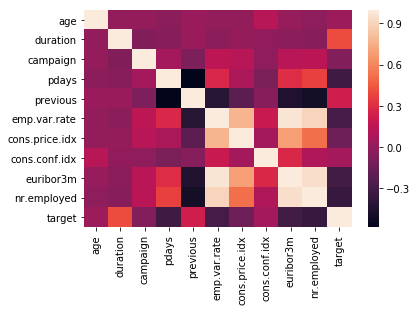

In [0]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

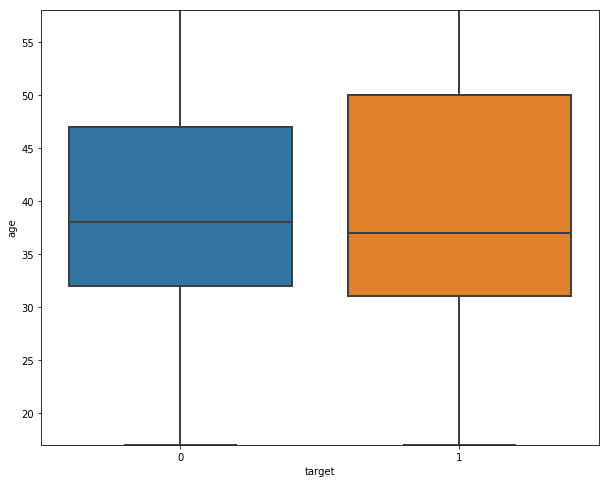

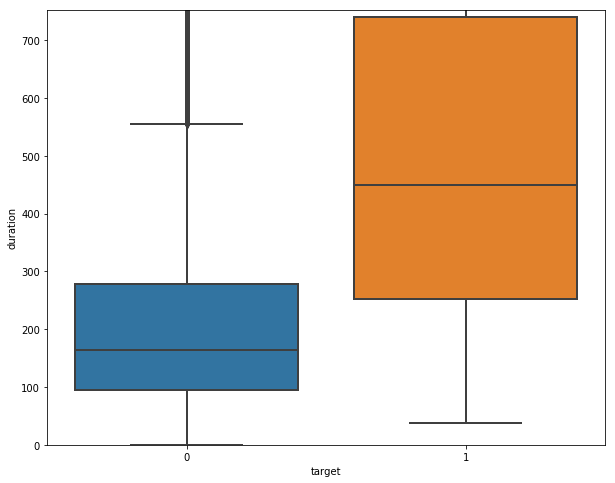

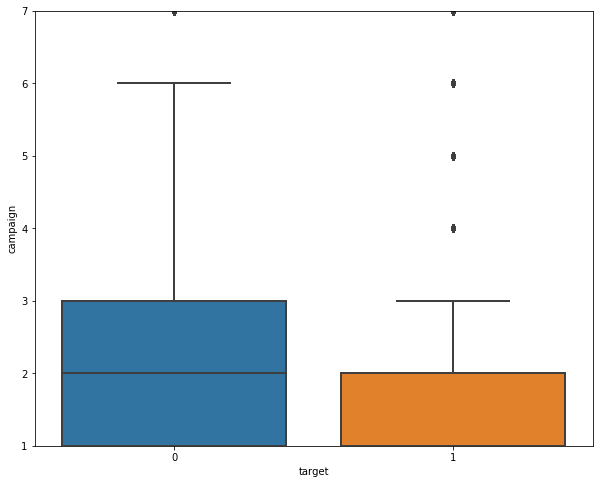

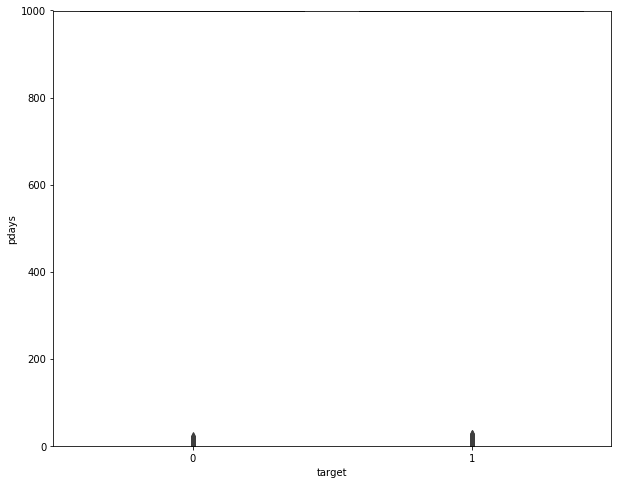

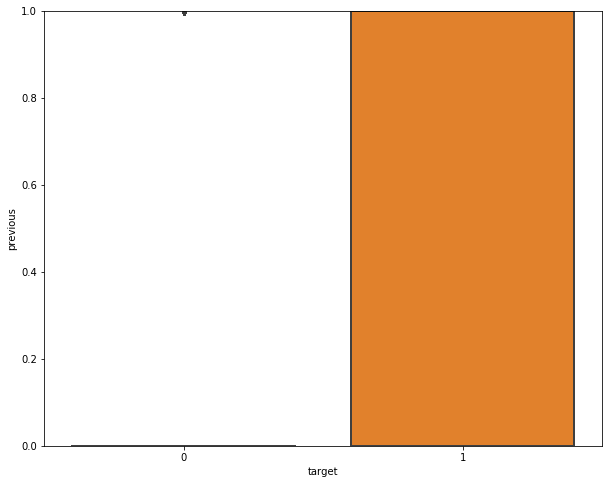

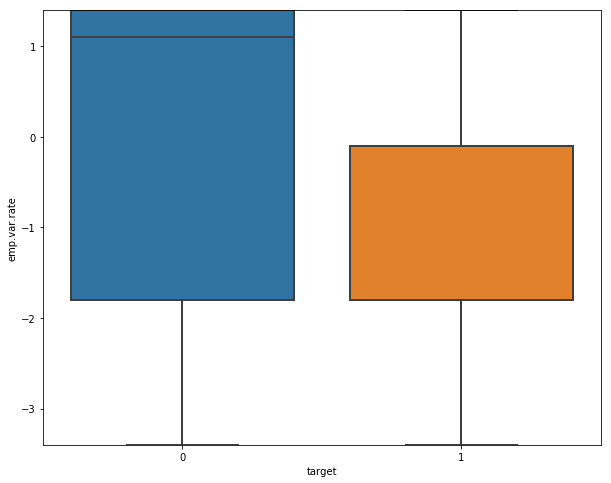

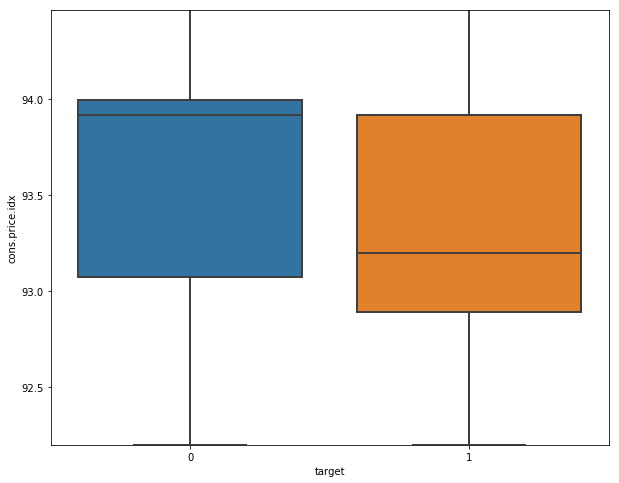

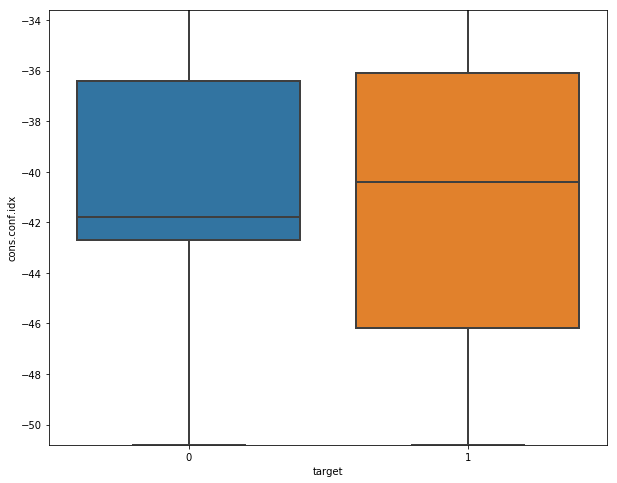

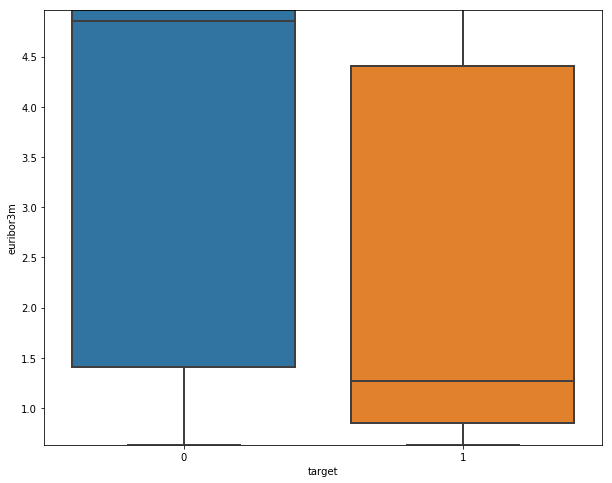

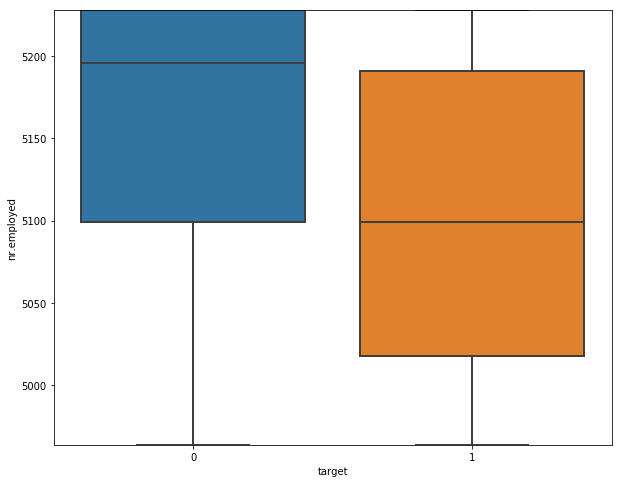

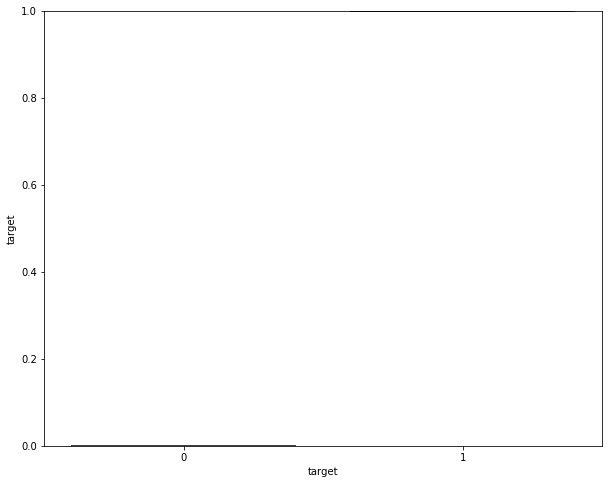

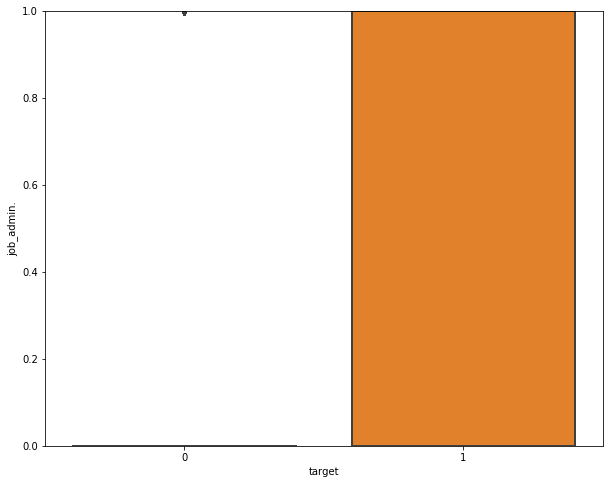

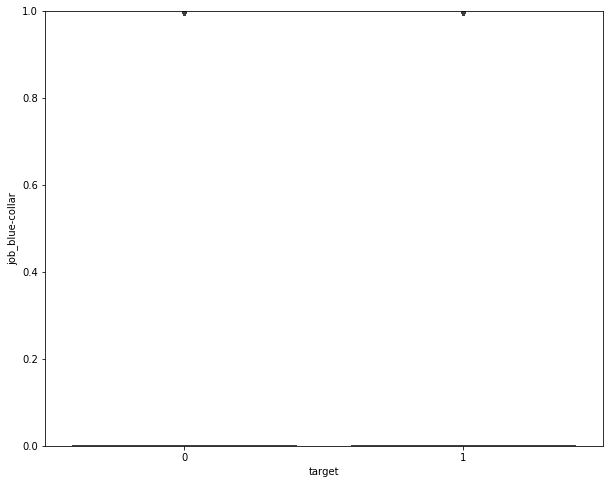

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


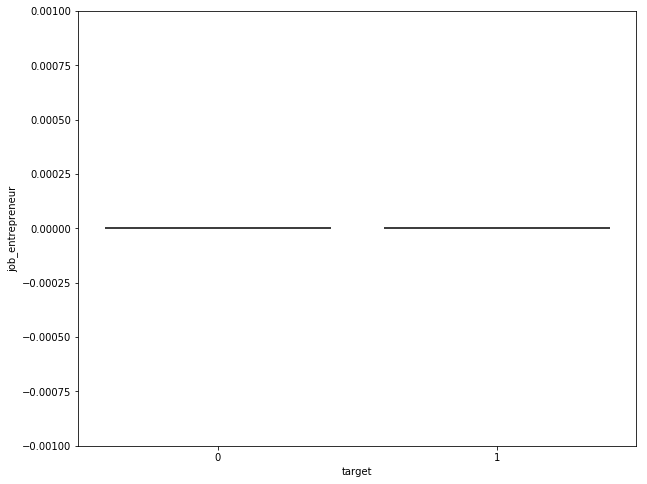

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


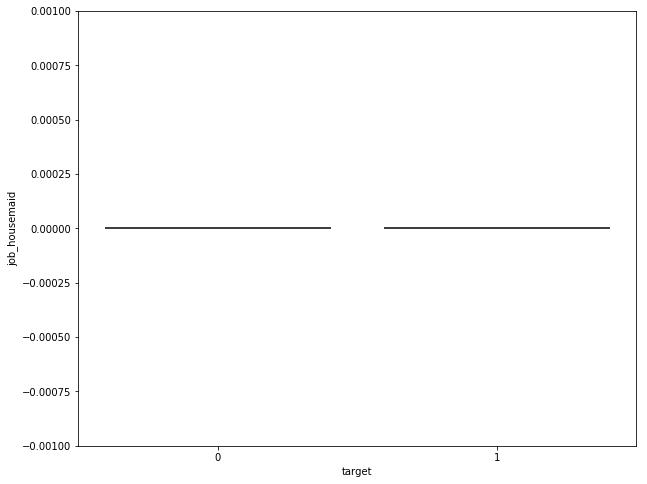

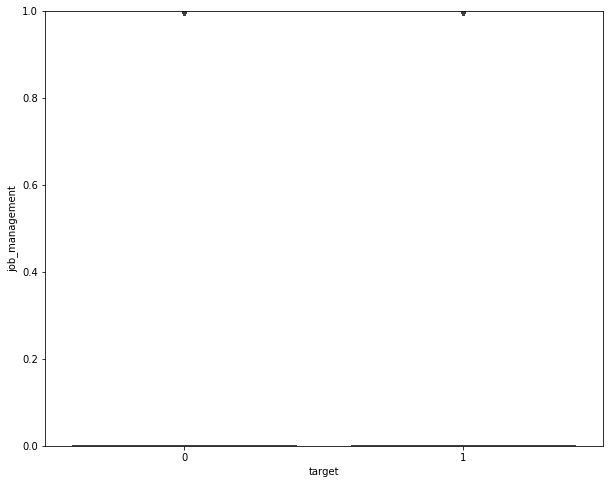

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


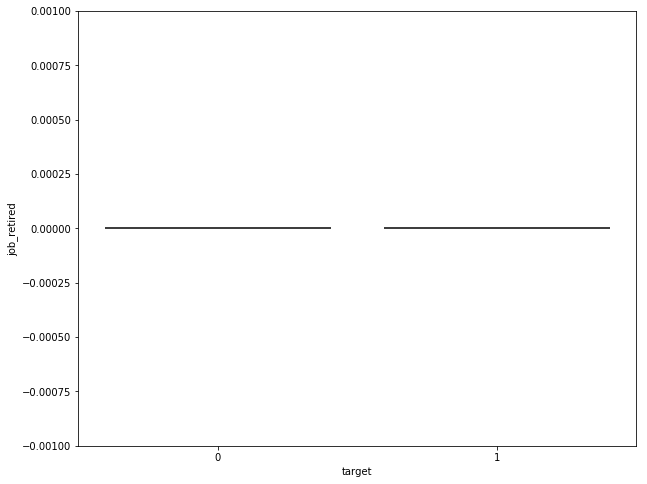

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


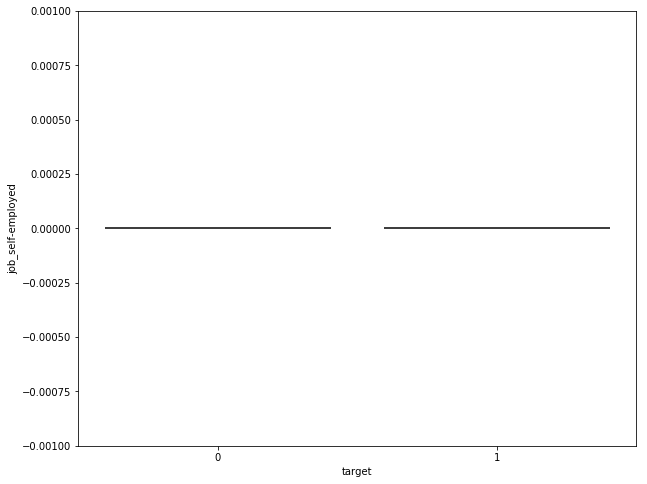

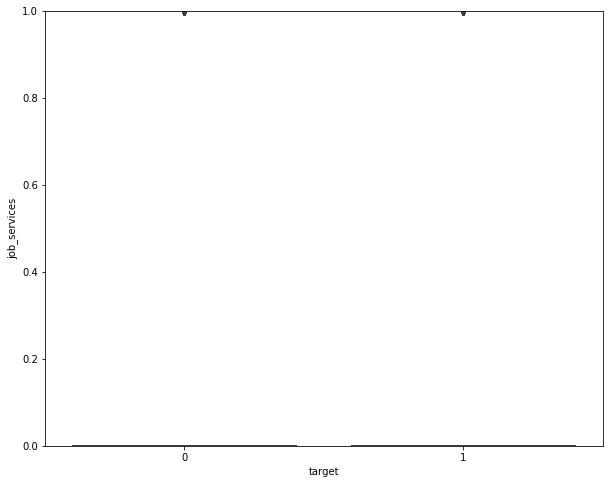

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


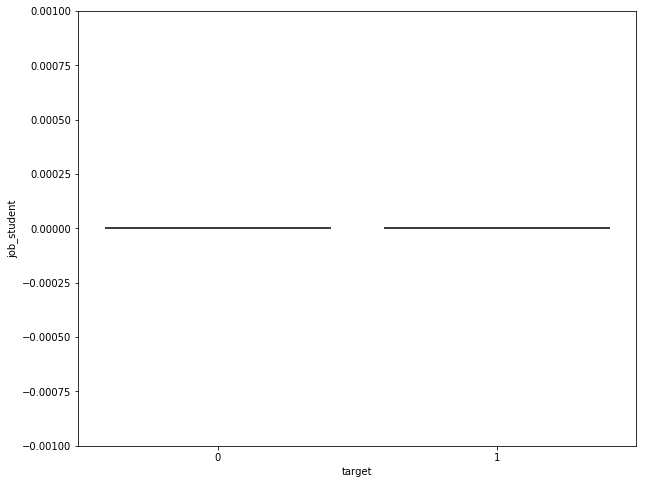

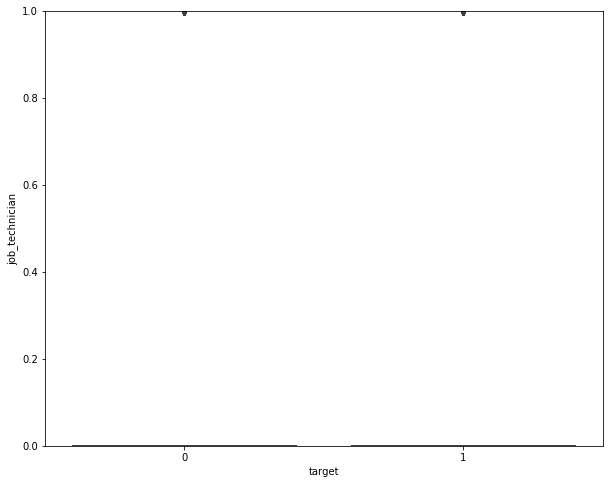

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


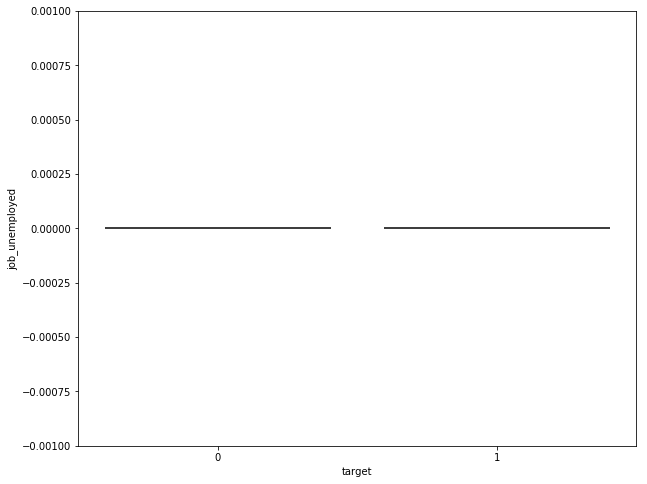

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


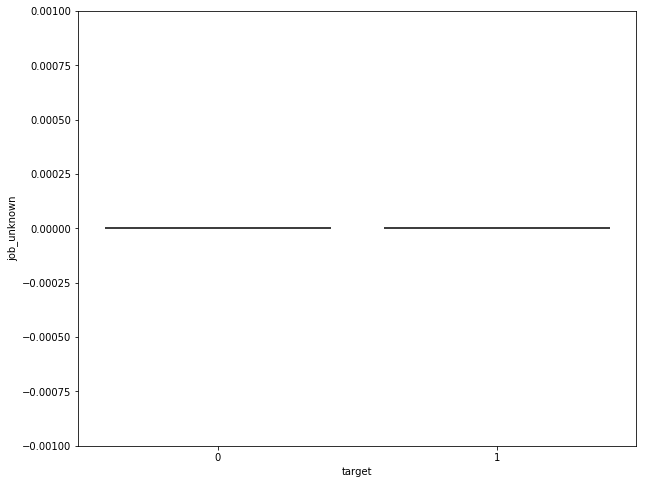

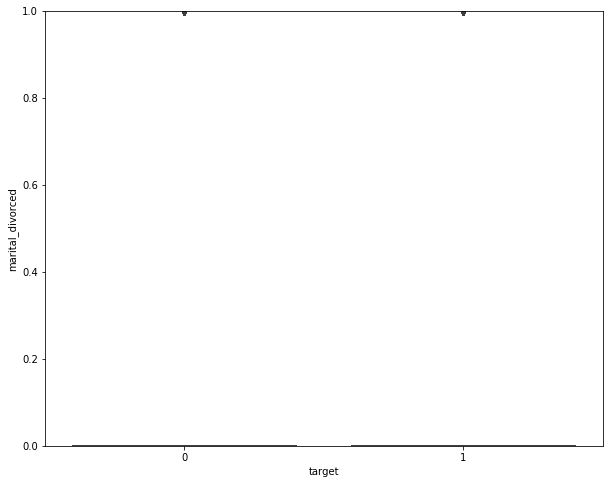

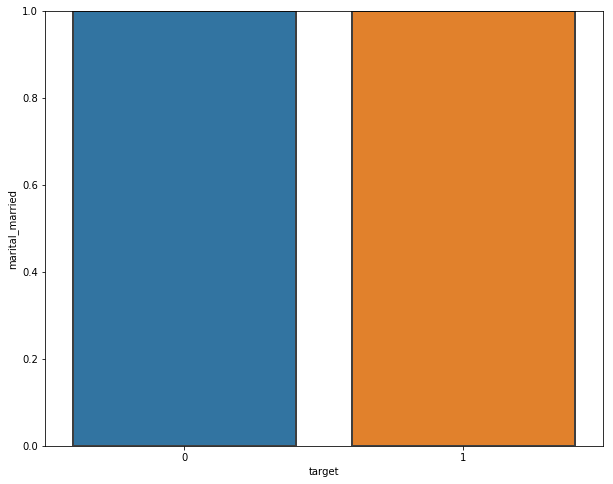

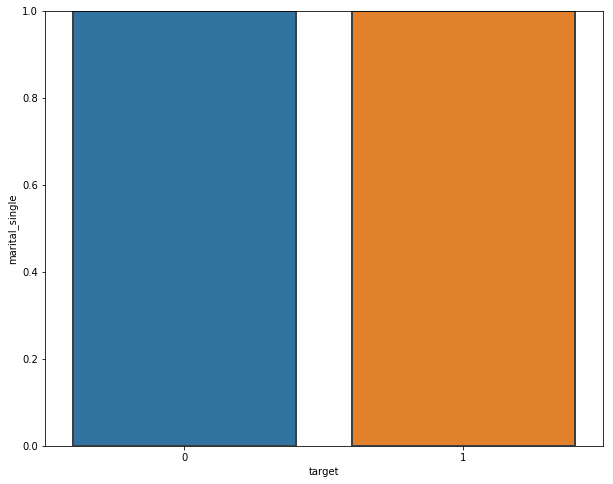

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


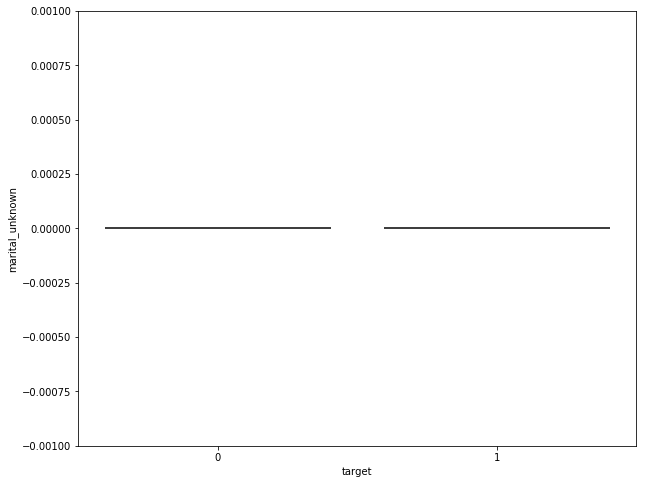

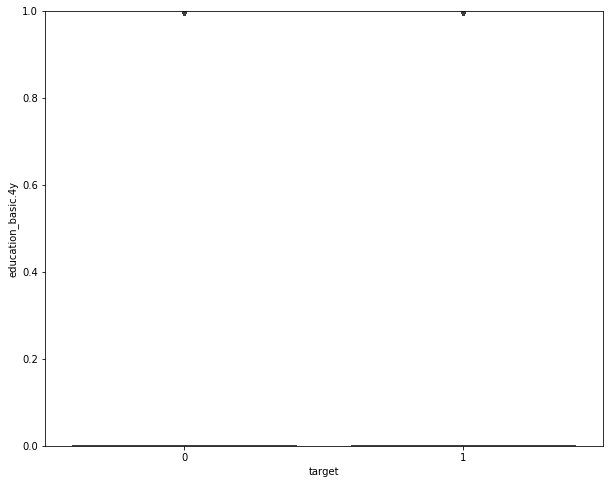

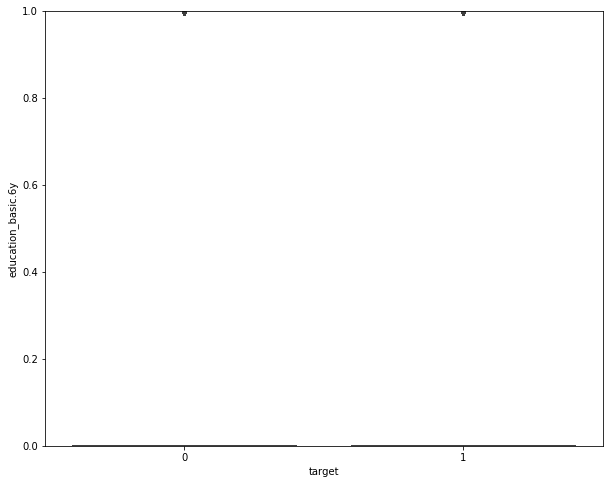

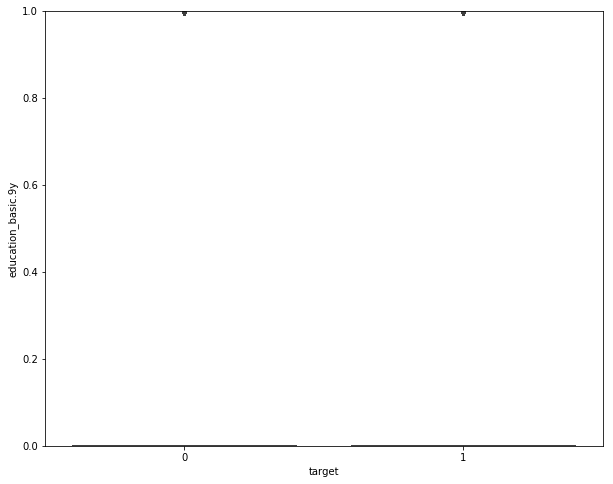

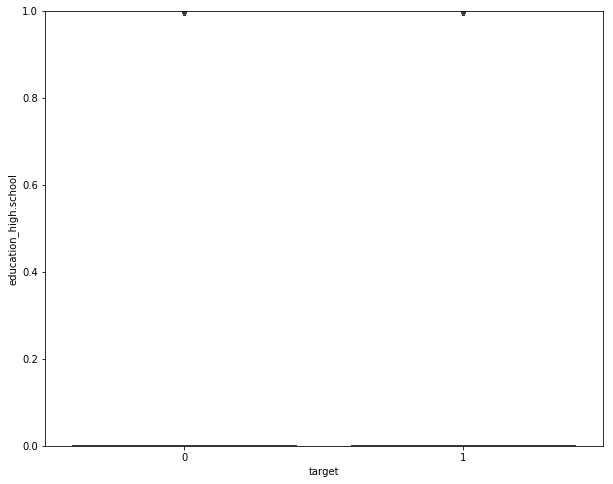

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


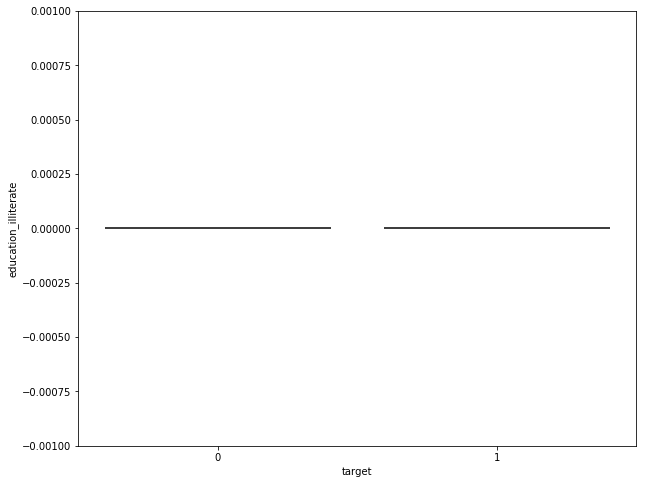

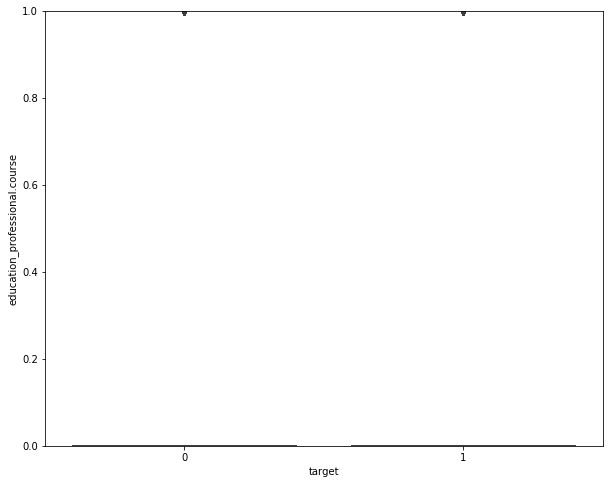

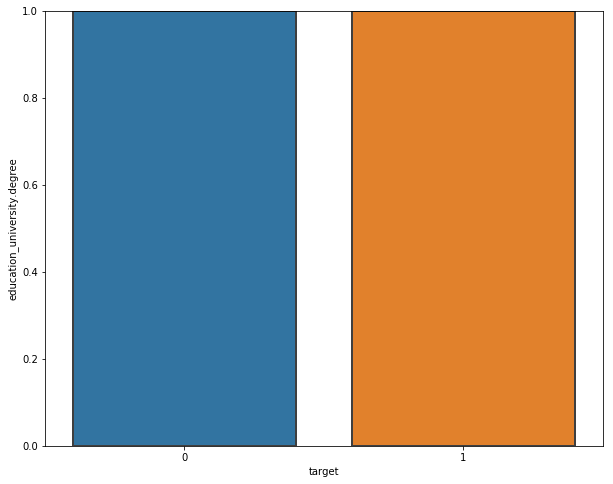

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


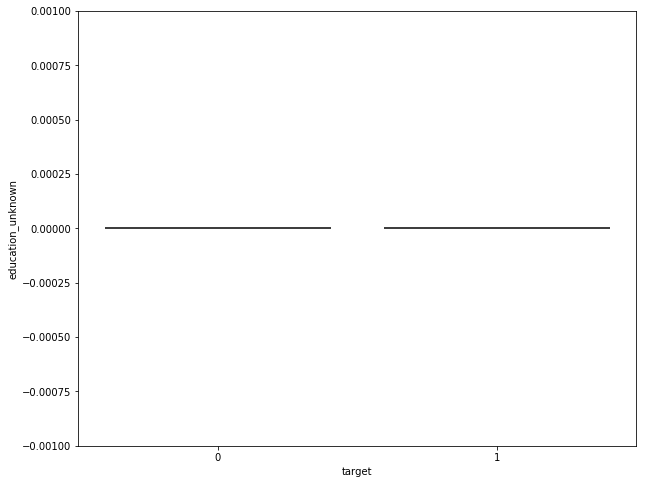

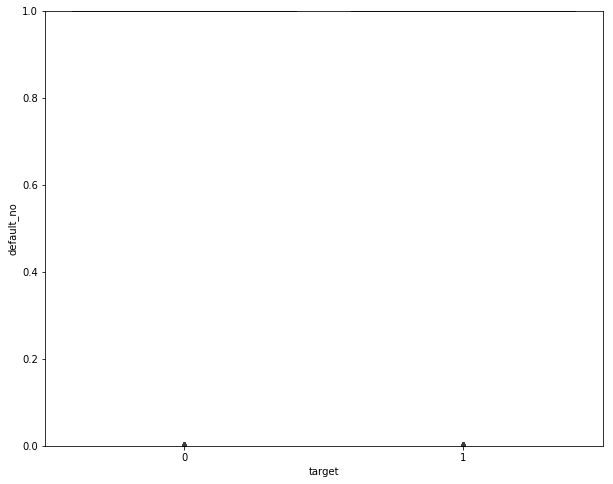

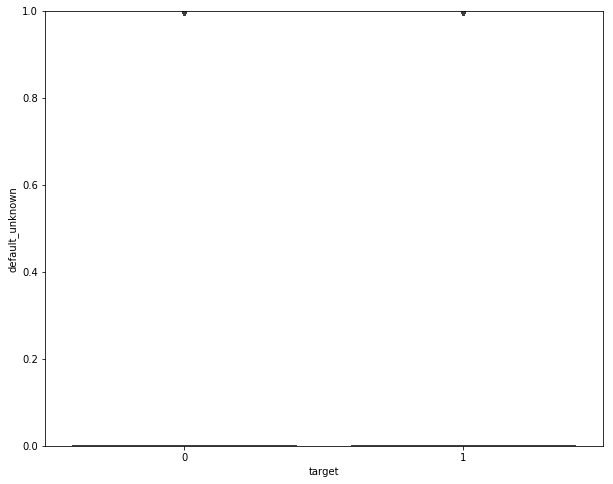

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


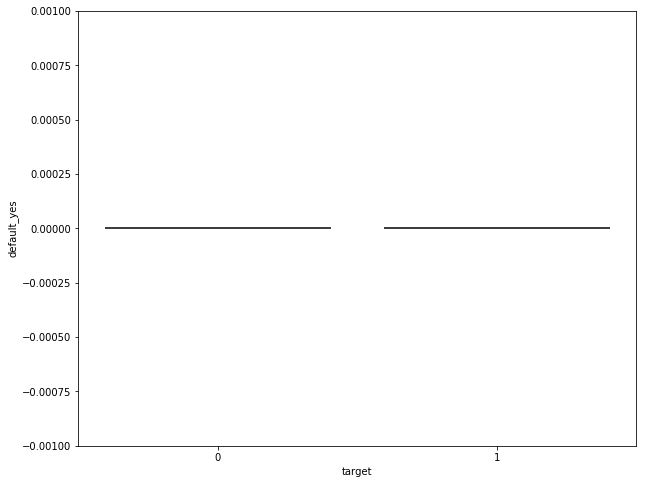

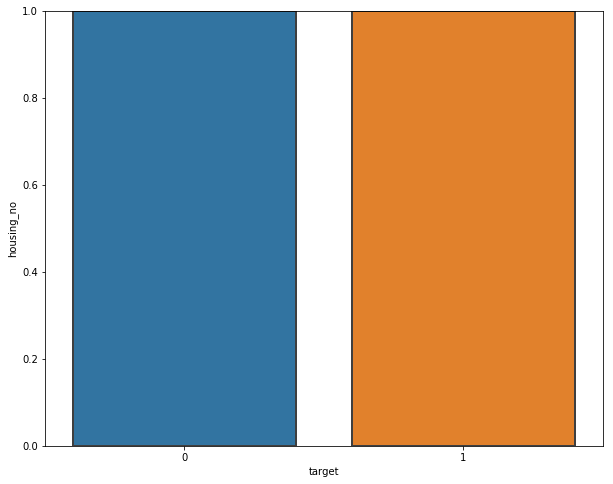

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


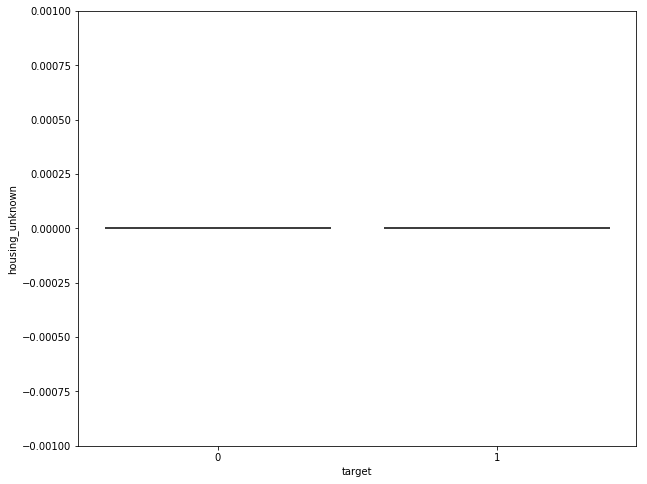

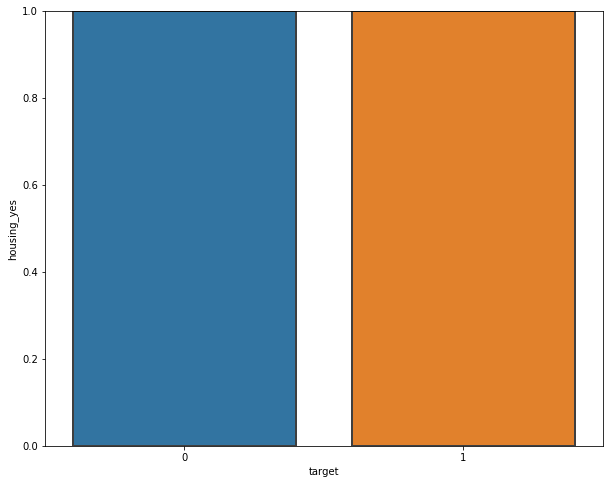

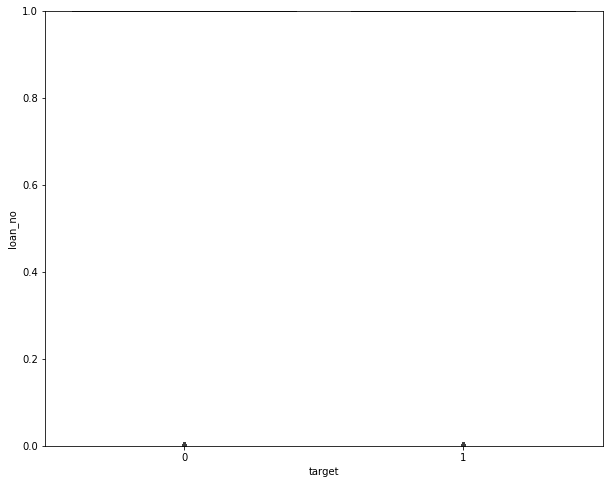

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


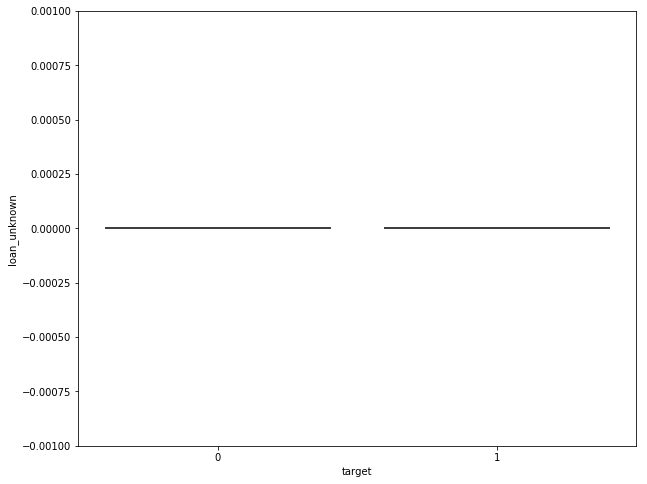

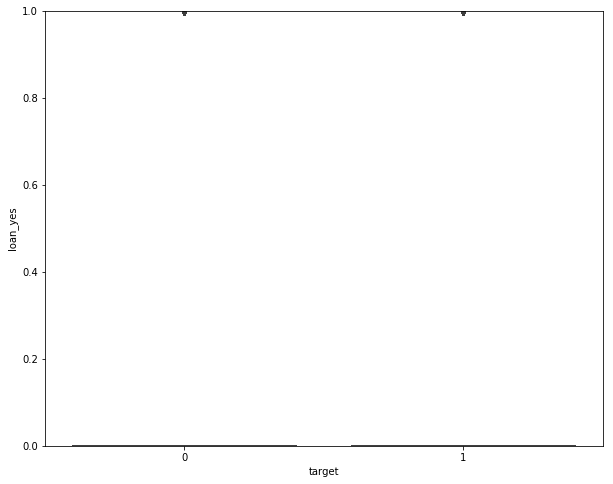

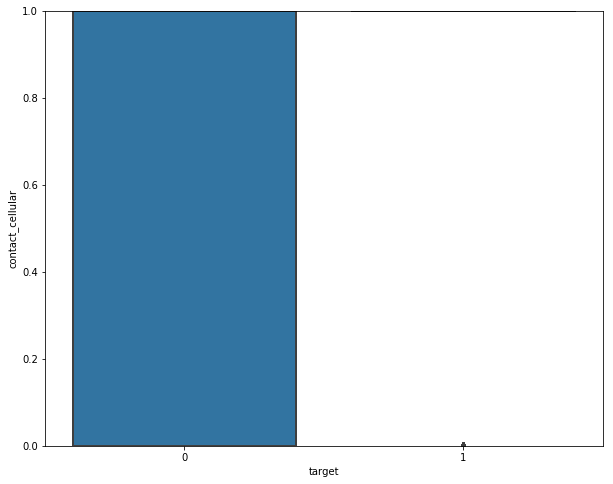

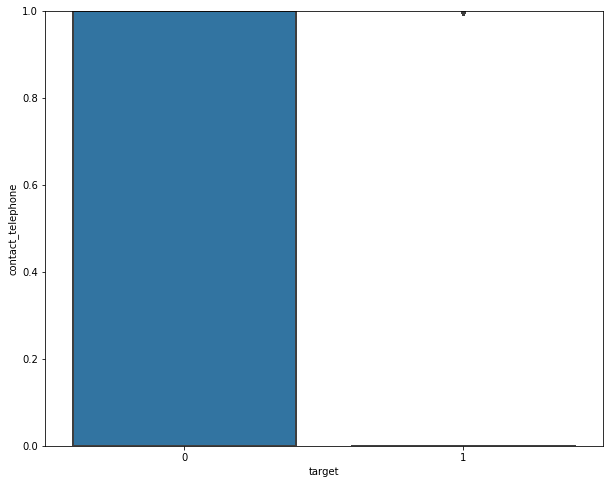

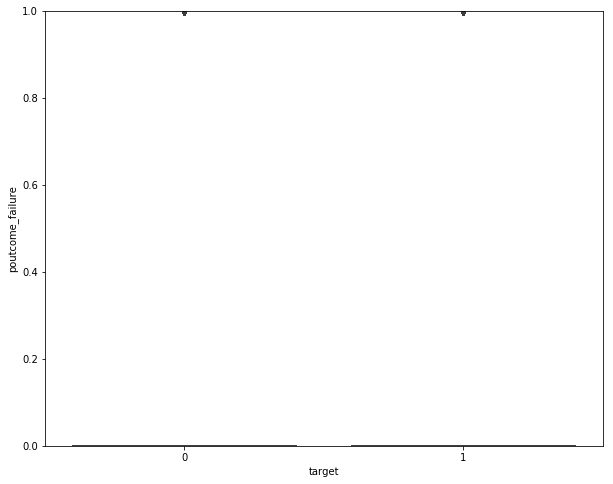

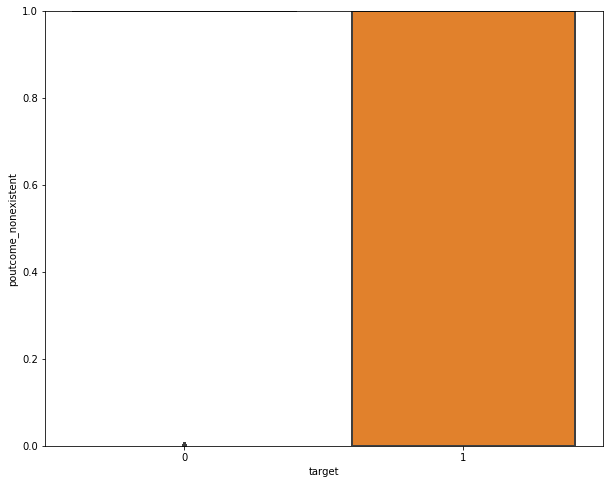

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


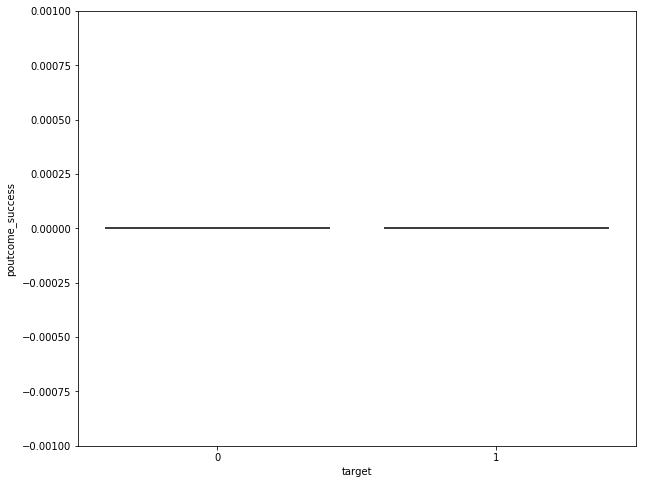

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  # This is added back by InteractiveShellApp.init_path()


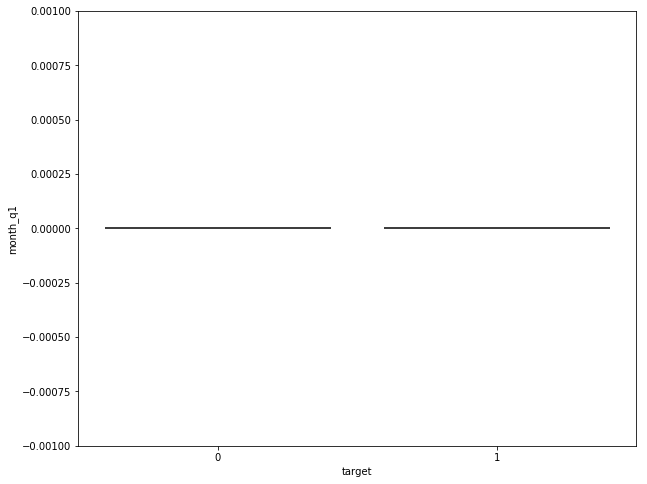

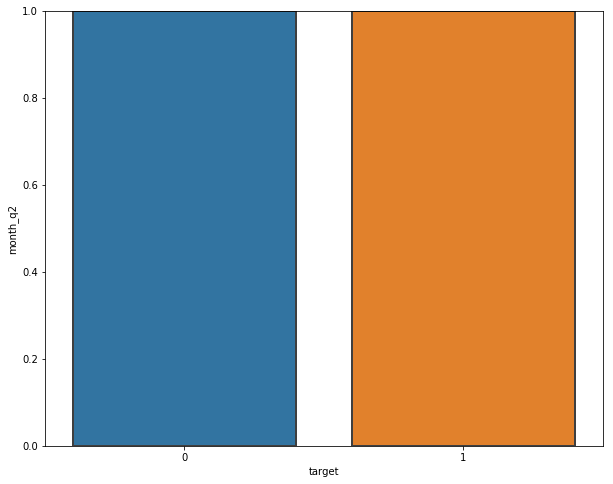

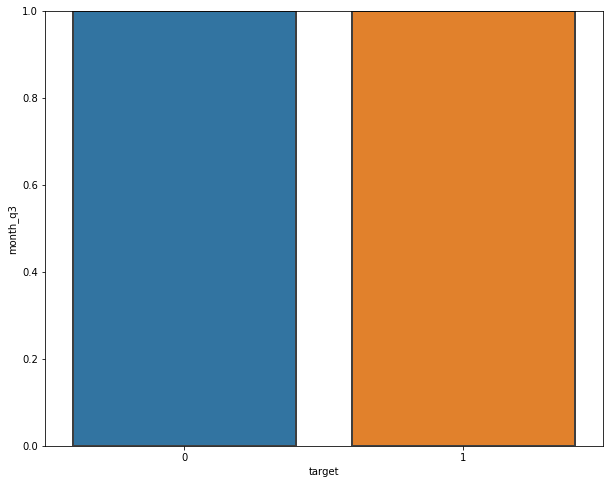

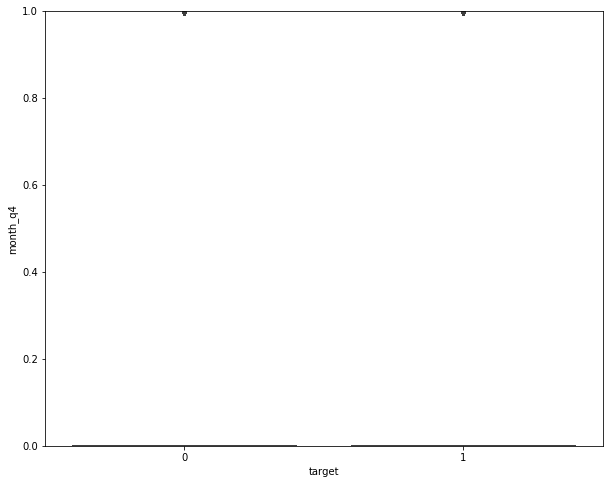

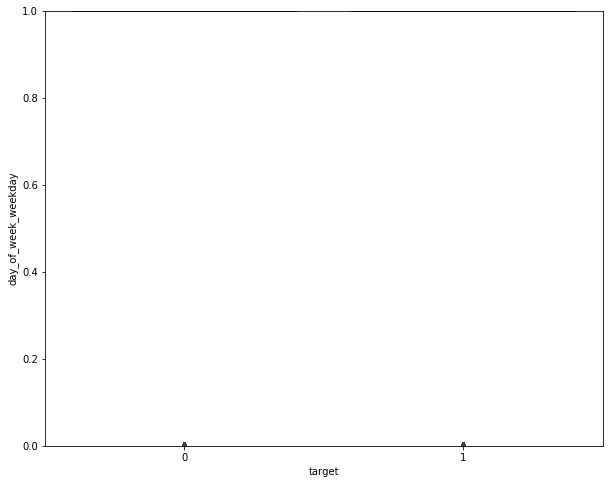

In [0]:
# Boxplot for Numderic Variables
numeric_data=df.select_dtypes(include=[np.number])
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x = plt.xticks(rotation=90)
    
for i in range(df.shape[1]-1):
    colname = numeric_data.columns[i]
    ax = sns.boxplot(x="target", y=colname, data=numeric_data,linewidth=2)
    axes = plt.gca()
    ymin=np.percentile(numeric_data[colname],0)
    ymax=np.percentile(numeric_data[colname],95)
    axes.set_ylim([ymin,ymax])
    plt.show()

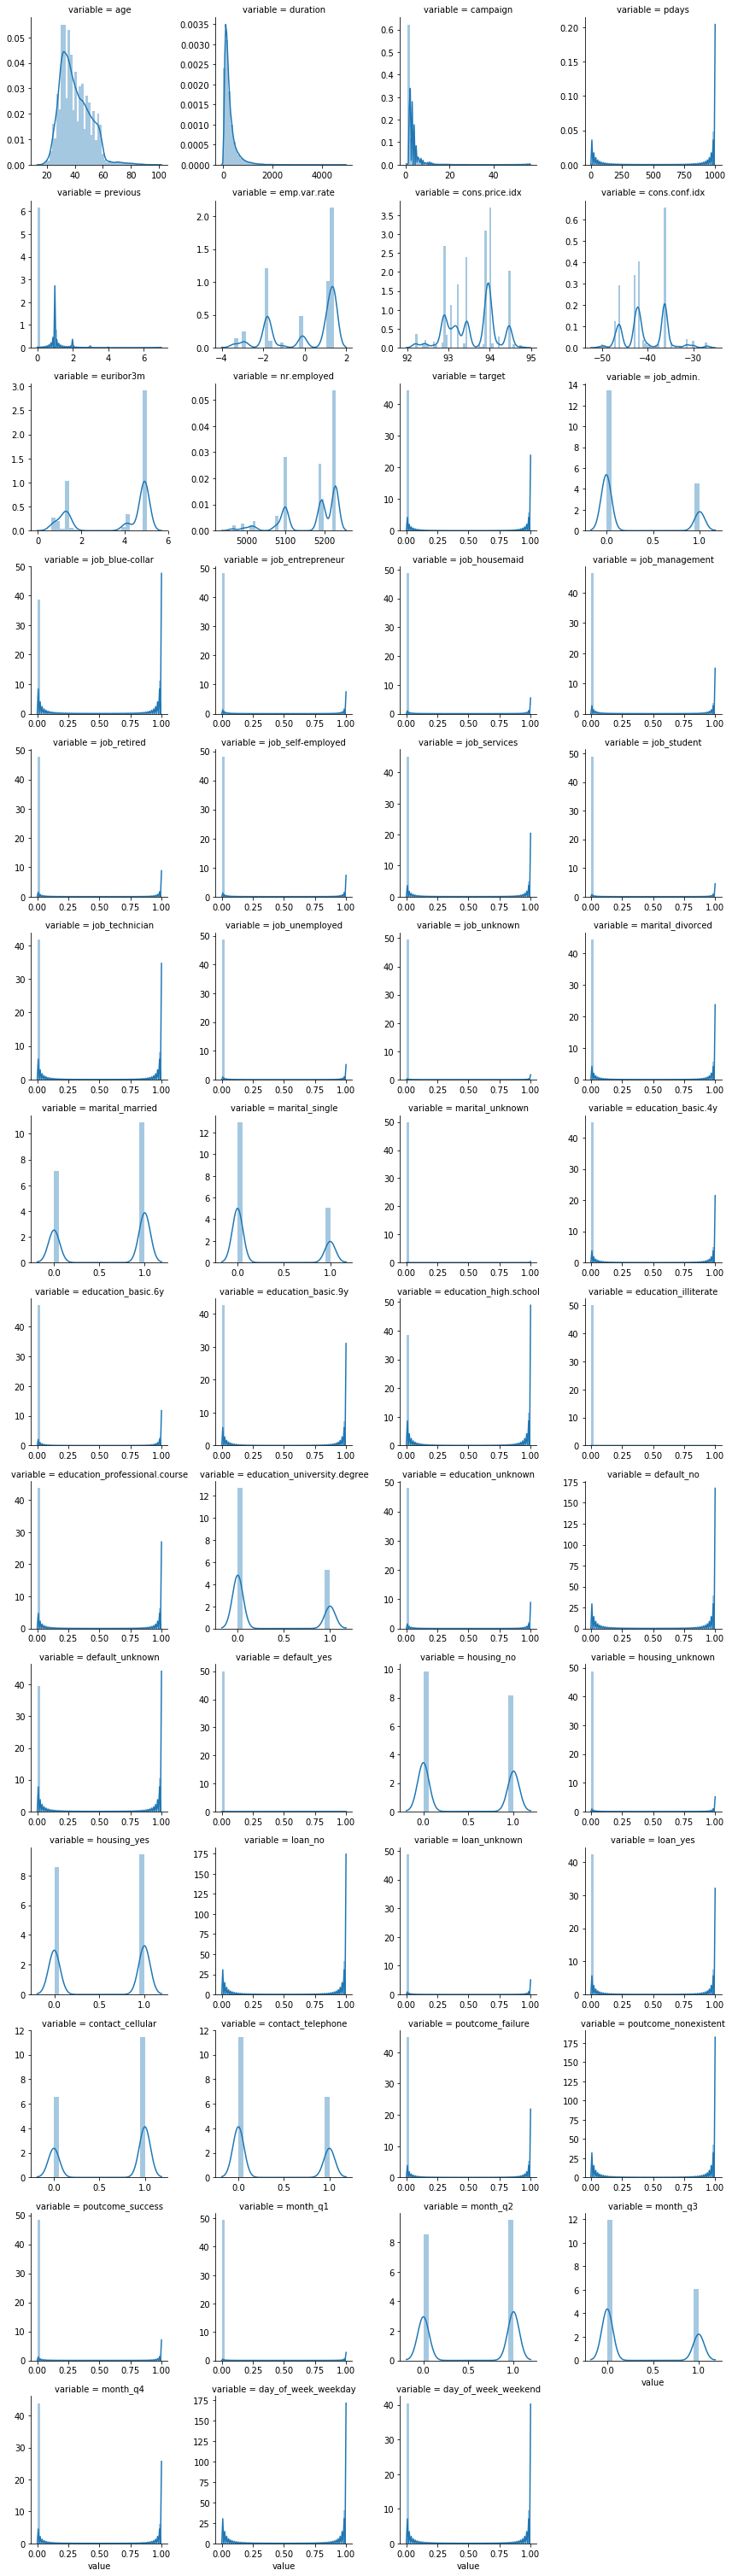

In [0]:
# All Density Graphs for univariate analysis
num= [f for f in numeric_data.columns if numeric_data.dtypes[f] != 'object']
nd = pd.melt(numeric_data, value_vars = num)
n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [0]:
# Pairplot
sns.pairplot(numeric_data)

# 4. Feature Engineering

In [0]:
conditions = [(df['month'] == 'jan'),
              (df['month'] == 'feb'),
              (df['month'] == 'mar'),
              (df['month'] == 'apr'),
              (df['month'] == 'may'),
              (df['month'] == 'jun'),
              (df['month'] == 'jul'),
              (df['month'] == 'aug'),
              (df['month'] == 'sep'),
              (df['month'] == 'oct'),
              (df['month'] == 'nov'),
              (df['month'] == 'dec')] 
choices = ['q1', 'q1', 'q1','q2','q2','q2','q3','q3','q3','q4','q4','q4'] 
df['mon'] = np.select(conditions, choices)

In [0]:
conditions = [(df['day_of_week'] == 'mon'),
              (df['day_of_week'] == 'tue'),
              (df['day_of_week'] == 'wed'),
              (df['day_of_week'] == 'thu'),
              (df['day_of_week'] == 'fri'),
              (df['day_of_week'] == 'sat'),
              (df['day_of_week'] == 'sun')] 
choices = ['weekday', 'weekday', 'weekday','weekday','weekend','weekend','weekend'] 
df['day'] = np.select(conditions, choices)

In [0]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,mon,day
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,q2,weekday
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,q2,weekday
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,q2,weekday
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,q2,weekday
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,q2,weekday


In [0]:
df.drop('month',axis=1,inplace=True)
df.drop('day_of_week',axis=1,inplace=True)

In [0]:
df = df.rename(columns = {"mon": "month", 
                                  "day":"day_of_week"})

In [0]:
cols_at_end = ['target']
df=df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]

# 5. Creating Dummy Variables

In [0]:
cat_data=df.select_dtypes(exclude=[np.number])
numeric_data=df.select_dtypes(include=[np.number])

In [0]:
df1=df

In [0]:
for i in range(cat_data.shape[1]):
    colname = cat_data.columns[i]
    df1=pd.concat([df1.drop(colname,axis=1),pd.get_dummies(df1[colname],prefix=colname)],axis=1)
    print(colname)

job
marital
education
default
housing
loan
contact
poutcome
month
day_of_week


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
target                           41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired      

# 5. Variable Selection using Python - Vote based approach

# 5.1 WOE and IV

In [0]:
df=df1

In [0]:
features = df[df.columns.difference(['target'])]
labels = df['target']

In [0]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [0]:
final_iv, IV = data_vars(df[df.columns.difference(['target'])],df.target)

C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log
C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


In [0]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,17.000,38.000,21175,2523,0.119150,18652,0.880850,0.543750,0.510343,0.063407,4.479019e-03
1,age,39.000,98.000,20013,2117,0.105781,17896,0.894219,0.456250,0.489657,-0.070665,4.479019e-03
2,campaign,1.000,2.000,28212,3511,0.124451,24701,0.875549,0.756681,0.675851,0.112969,3.231584e-02
3,campaign,3.000,56.000,12976,1129,0.087007,11847,0.912993,0.243319,0.324149,-0.286830,3.231584e-02
4,cons.conf.idx,-50.800,-41.800,23551,2029,0.086153,21522,0.913847,0.437284,0.588869,-0.297621,9.269175e-02
5,cons.conf.idx,-40.800,-26.900,17637,2611,0.148041,15026,0.851959,0.562716,0.411131,0.313863,9.269175e-02
6,cons.price.idx,92.201,93.200,15066,2419,0.160560,12647,0.839440,0.521336,0.346038,0.409846,1.267592e-01
7,cons.price.idx,93.369,93.918,12577,1089,0.086587,11488,0.913413,0.234698,0.314326,-0.292131,1.267592e-01
8,cons.price.idx,93.994,94.767,13545,1132,0.083573,12413,0.916427,0.243966,0.339636,-0.330846,1.267592e-01
9,contact_cellular,0.000,0.000,15044,787,0.052313,14257,0.947687,0.169612,0.390090,-0.832863,2.516629e-01


In [0]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
11,duration,1.625228e+00
52,poutcome_success,5.187224e-01
21,euribor3m,3.485441e-01
48,nr.employed,3.425181e-01
51,poutcome_nonexistent,2.777967e-01
20,emp.var.rate,2.692167e-01
4,contact_cellular,2.516629e-01
5,contact_telephone,2.516629e-01
53,previous,2.173176e-01
8,default_no,1.278855e-01


In [0]:
IV=round(IV,2)

In [0]:
IV

,index,IV
0,age,0.00
1,campaign,0.03
2,cons.conf.idx,0.09
3,cons.price.idx,0.13
4,contact_cellular,0.25
5,contact_telephone,0.25
6,day_of_week_weekday,0.00
7,day_of_week_weekend,0.00
8,default_no,0.13
9,default_unknown,0.13


# 5.2 Variable Importance using Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9923521414004078


In [0]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [0]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
11,duration,0.299074
21,euribor3m,0.111125
0,age,0.082569
1,campaign,0.043818
48,nr.employed,0.040694
49,pdays,0.038668
2,cons.conf.idx,0.032723
20,emp.var.rate,0.027954
3,cons.price.idx,0.026961
53,previous,0.017507


# 5.3 Recursive Feature Elimination

In [0]:
 from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [0]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [0]:
Selected[Selected['RFE'] == True]

,index,RFE
4,contact_cellular,True
5,contact_telephone,True
6,day_of_week_weekday,True
7,day_of_week_weekend,True
8,default_no,True
9,default_unknown,True
14,education_basic.9y,True
19,education_unknown,True
21,euribor3m,True
26,job_blue-collar,True


# 5.4 Variable Importance using Extratrees Classifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08537176 0.06001562 0.01854332 0.016753   0.00639034 0.00951474
 0.00993851 0.01023152 0.00607823 0.00546253 0.         0.24155114
 0.00729901 0.00538628 0.00938762 0.01331231 0.00033533 0.01021106
 0.01404644 0.00610879 0.02482855 0.11097212 0.01666252 0.00235729
 0.01692344 0.01376717 0.00863666 0.0045661  0.00414216 0.0072894
 0.00680868 0.00500261 0.00717597 0.00626909 0.01144642 0.00544992
 0.00231332 0.01102574 0.00215828 0.01064311 0.00885639 0.01205071
 0.00968588 0.00058469 0.00693349 0.00695343 0.00604554 0.00344632
 0.05189259 0.03280155 0.00522568 0.00521707 0.0273534  0.00857718]


In [0]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [0]:
FI = FI.reset_index()

In [0]:
FI.sort_values(['Extratrees'],ascending=0)
FI=round(FI,2)
FI


,index,Extratrees
0,age,0.09
1,campaign,0.06
2,cons.conf.idx,0.02
3,cons.price.idx,0.02
4,contact_cellular,0.01
5,contact_telephone,0.01
6,day_of_week_weekday,0.01
7,day_of_week_weekend,0.01
8,default_no,0.01
9,default_unknown,0.01


# 5.5 Chi Square

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [0]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [0]:
chi_sq = chi_sq.reset_index()

In [0]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
11,duration,1760733.13
49,pdays,157825.77
48,nr.employed,5234.58
52,poutcome_success,3982.55
21,euribor3m,3240.97
53,previous,3090.17
44,month_q1,842.92
20,emp.var.rate,684.00
5,contact_telephone,547.96
1,campaign,541.97


# 5.6 L1 feature selection

In [0]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

C:\Users\Vertika\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

In [0]:
l1[l1['L1'] == True]

,index,L1
0,age,True
1,campaign,True
2,cons.conf.idx,True
3,cons.price.idx,True
9,default_unknown,True
11,duration,True
14,education_basic.9y,True
18,education_university.degree,True
21,euribor3m,True
25,job_admin.,True


# 5.7 Combine all together

In [0]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

# 4.8 Vote each variable

In [0]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [0]:
score_table['final_score'] = score_table.sum(axis=1)

In [0]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
21,euribor3m,1,1,1,1,1,1,6
11,duration,1,1,1,1,0,1,5
48,nr.employed,1,1,1,1,0,0,4
0,age,0,1,1,0,0,1,3
1,campaign,0,1,1,0,0,1,3
51,poutcome_nonexistent,1,0,0,0,1,0,2
26,job_blue-collar,0,0,0,0,1,1,2
30,job_retired,0,0,0,0,1,1,2
32,job_services,0,0,0,0,1,1,2
33,job_student,0,0,0,0,1,1,2


# 5.9 Multicollinearity

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [0]:
features = features[list(score_table[score_table['final_score'] >= 1]['index'])]

KeyError: "['nr.employed', 'poutcome_nonexistent', 'pdays'] not in index"

In [0]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [0]:
list(vif['Features'])

['age',
 'campaign',
 'default_unknown',
 'duration',
 'education_basic.9y',
 'euribor3m',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'month_q2',
 'month_q3',
 'poutcome_failure',
 'poutcome_success']

# Descriptive Stats and Visualization - For selected variables

In [0]:
final_vars = list(vif['Features']) + ['target']

In [0]:
df1 = df[final_vars].fillna(0)

In [0]:
df1.describe()

,age,campaign,default_unknown,duration,education_basic.9y,euribor3m,job_blue-collar,job_retired,job_services,job_student,month_q2,month_q3,poutcome_failure,poutcome_success,target
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,2.57,0.21,258.29,0.15,3.62,0.22,0.04,0.10,0.02,0.53,0.34,0.10,0.03,0.11
std,10.42,2.77,0.41,259.28,0.35,1.73,0.42,0.20,0.30,0.14,0.50,0.47,0.30,0.18,0.32
min,17.00,1.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,1.00,0.00,102.00,0.00,1.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,38.00,2.00,0.00,180.00,0.00,4.86,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,47.00,3.00,0.00,319.00,0.00,4.96,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
max,98.00,56.00,1.00,4918.00,1.00,5.04,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\Vertika\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


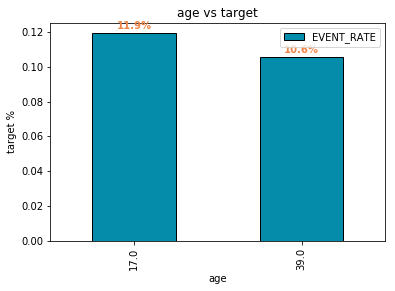

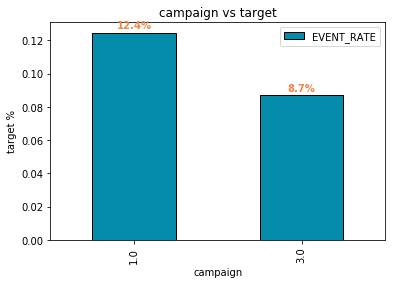

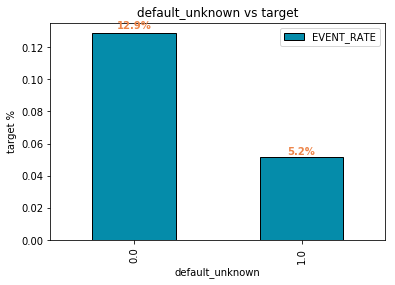

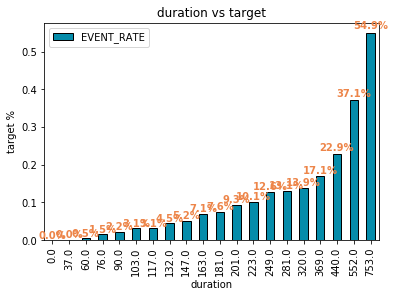

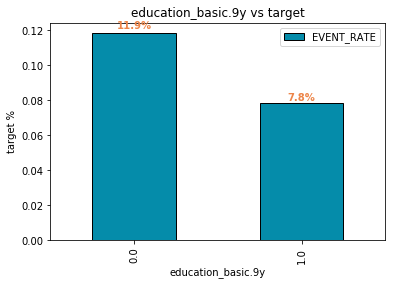

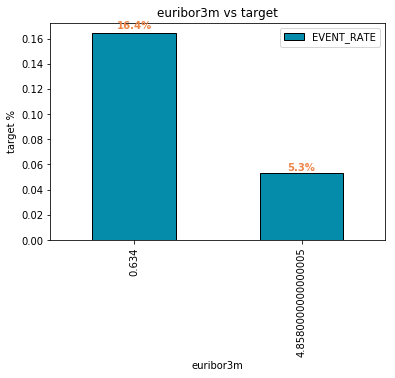

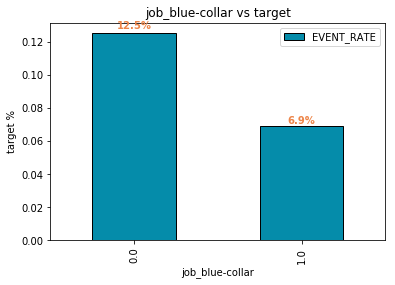

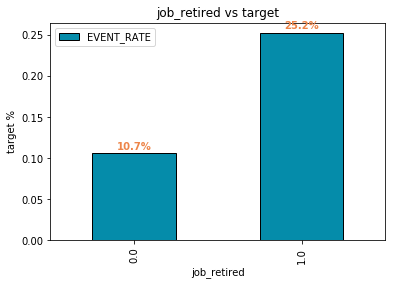

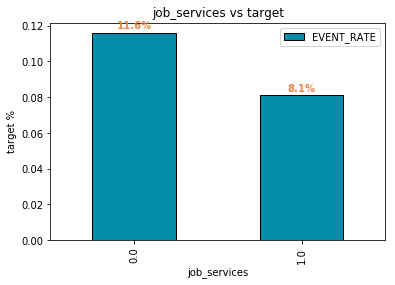

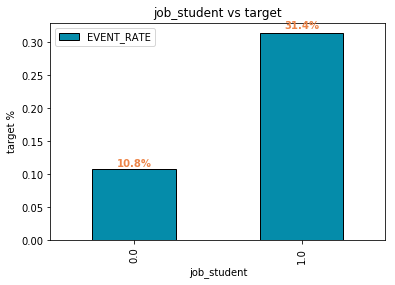

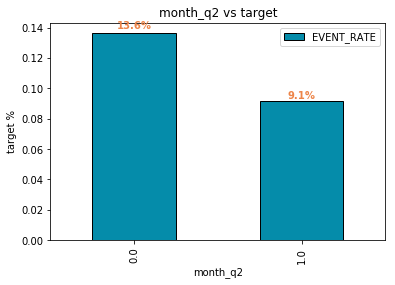

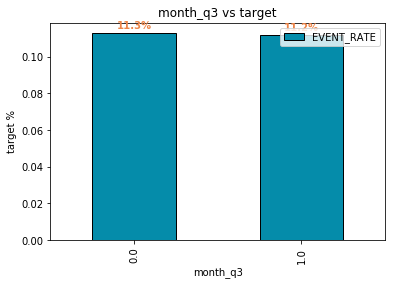

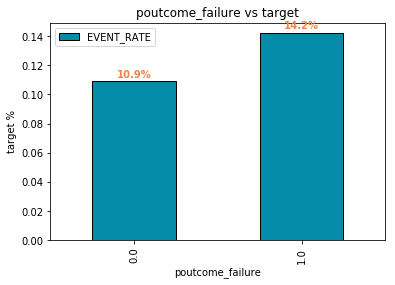

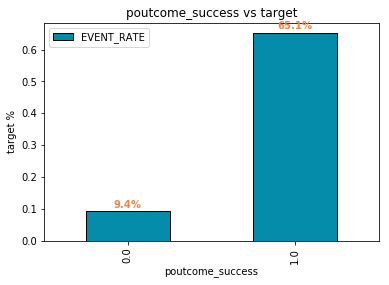

In [0]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df1,df1['target'])
final_iv = final_iv[(final_iv.VAR_NAME != 'target')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

# 6. Model

In [0]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size = 0.3)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['target']
features_test = test[list(vif['Features'])]
label_test = test['target']

train, test = train_test_split(df1, test_size = 0.3)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['target']
features_test = test[list(vif['Features'])]
label_test = test['target']

# 7. Performance Tuning

# Random Forest - Hyper parameter tuning

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(features_train, label_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


{'n_estimators': 118, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_random.best_params_)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.9648988935520794 0.9156753257263089 0.9916828239547464 0.9440413308890956


In [0]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,25274,233
1,779,2545


In [0]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,10664,377
1,665,651


# 8.ROC - AUC Curve

In [0]:
from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = clf.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

ModuleNotFoundError: No module named 'bokeh.charts'

In [0]:
from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = clf.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

# Decile Plots and KS statistic

In [0]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [0]:
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [0]:
scores_train = scoring(features_train,clf,label_train)
scores_test = scoring(features_test,clf,label_test)

In [0]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,2883,2609,274,90.496,2609,274,78.4898,1.07421,77.4156
2.0,2883,712,2171,24.6965,3321,2445,99.9097,9.5856,90.3241
3.0,2883,3,2880,0.104058,3324,5325,100,20.8766,79.1234
4.0,2883,0,2883,0,3324,8208,100,32.1794,67.8206
5.0,2883,0,2883,0,3324,11091,100,43.4822,56.5178
6.0,2883,0,2883,0,3324,13974,100,54.785,45.215
7.0,2883,0,2883,0,3324,16857,100,66.0877,33.9123
8.0,2883,0,2883,0,3324,19740,100,77.3905,22.6095


In [0]:
deciling(scores_test,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,1236,760,476,61.4887,760,476,57.7508,4.3112,53.4396
2.0,1236,384,852,31.068,1144,1328,86.9301,12.0279,74.9022
3.0,1235,126,1109,10.2024,1270,2437,96.5046,22.0723,74.4323
4.0,1236,34,1202,2.75081,1304,3639,99.0881,32.959,66.1292
5.0,1235,6,1229,0.48583,1310,4868,99.5441,44.0902,55.4539
6.0,1236,4,1232,0.323625,1314,6100,99.848,55.2486,44.5994
7.0,1236,1,1235,0.0809061,1315,7335,99.924,66.4342,33.4898
8.0,1235,1,1234,0.0809717,1316,8569,100,77.6107,22.3893


# Lift chart, Actual vs predicted and Gains chart

In [0]:
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

In [0]:
def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')

In [0]:
lift_train = pd.concat([features_train,scores_train],axis=1)
lift_test = pd.concat([features_test,scores_test],axis=1)

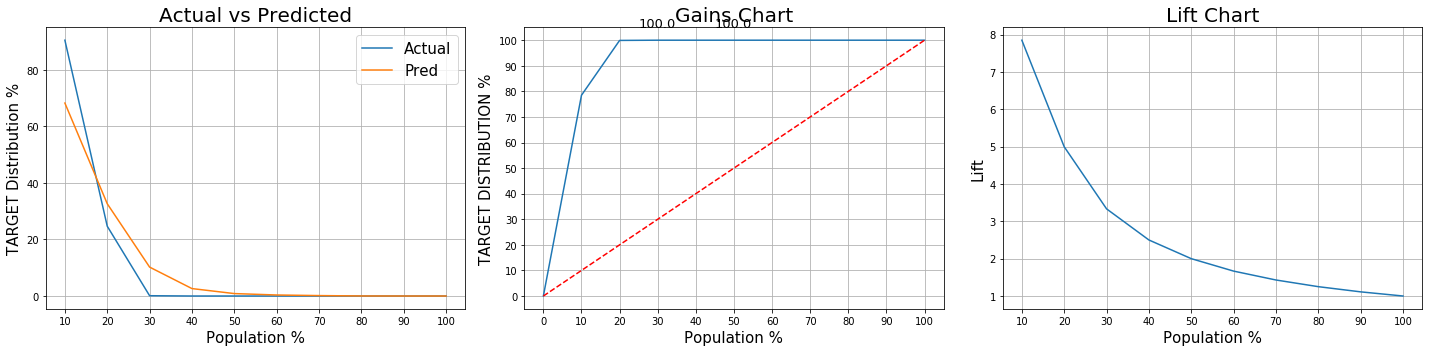

In [0]:
gains(lift_train,['DECILE'],'TARGET','SCORE')

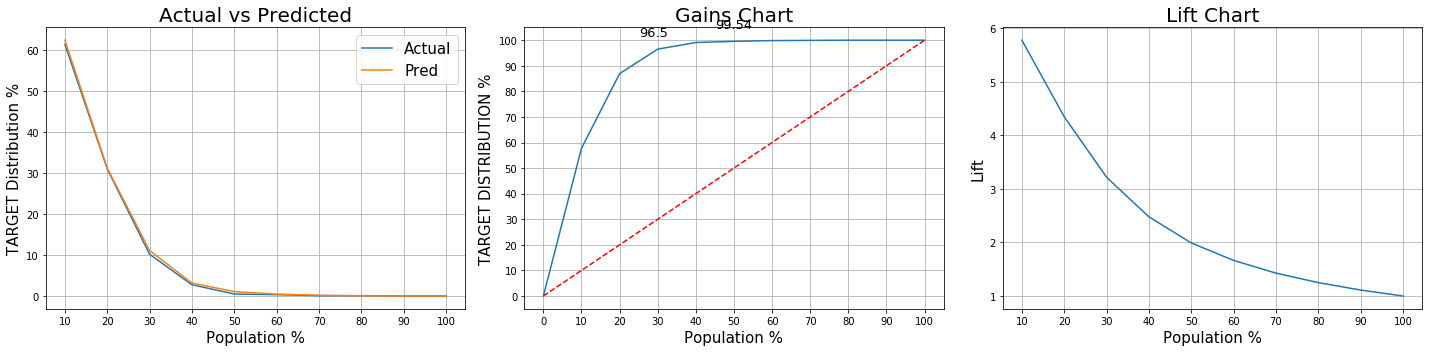

In [0]:
gains(lift_test,['DECILE'],'TARGET','SCORE')

# Save Model for future use

In [0]:
import pandas
from sklearn.externals import joblib

filename = 'final_model.model'
# i = [d,clf]
joblib.dump(clf,filename)

['final_model.model']

# Score New data

In [0]:
# Use the code to load the model
filename = 'final_model.model'

from sklearn.externals import joblib
clf=joblib.load(filename)

In [0]:
def score_new(features,clf):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)

In [0]:
scores = score_new(features_test,clf)

In [0]:
scores

,SCORE,DECILE
0,0.00,10.00
1,0.00,8.00
2,0.00,7.00
3,0.00,7.00
4,0.27,2.00
5,0.00,6.00
6,0.01,5.00
7,0.00,7.00
8,0.01,5.00
9,0.00,6.00
